In [14]:
!pip install kagglehub

In [16]:
# Install Kaggle library
!pip install -q kaggle

# Upload your kaggle.json file (only do this once)
from google.colab import files
files.upload()  # Click 'Choose Files' and select kaggle.json

# Setup Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [17]:
# Download your specific dataset directly to Colab
!kaggle datasets download -d revatisn/cancer-benign-and-malignant

# Unzip the dataset
!unzip -q cancer-benign-and-malignant.zip -d /content/cancer_dataset
# Check what files you have
!ls -lh

Dataset URL: https://www.kaggle.com/datasets/revatisn/cancer-benign-and-malignant
License(s): MIT
100% 5.21G/5.23G [02:05<00:00, 31.4MB/s]
100% 5.23G/5.23G [02:09<00:00, 43.3MB/s]
total 5.3G
-rw-r--r-- 1 root root 5.3G Oct 27 16:57 cancer-benign-and-malignant.zip
drwxr-xr-x 3 root root 4.0K Nov  3 19:29 cancer_dataset
-rw-r--r-- 1 root root   68 Nov  3 19:26 kaggle.json
drwxr-xr-x 1 root root 4.0K Oct 31 17:50 sample_data


In [19]:
import torch
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [20]:
data_dir = "/content/cancer_dataset"

In [21]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt



INCEPTIONV3 BINARY CLASSIFICATION PIPELINE
Benign vs Malignant Tumor Detection
PREPARING DATA DIRECTORY STRUCTURE

Total images found: 65002
  - Benign: 25001
  - Malignant: 40001

Data split:
  - Training set: 45500 images
    • Benign: 17501
    • Malignant: 27999
  - Validation set: 9751 images
    • Benign: 3750
    • Malignant: 6001
  - Test set: 9751 images
    • Benign: 3750
    • Malignant: 6001

Copying images to organized directory structure...
✓ Data organization complete!

CREATING DATA GENERATORS
Found 45500 images belonging to 2 classes.
Found 9751 images belonging to 2 classes.
Found 9751 images belonging to 2 classes.

✓ Data generators created successfully!
  - Training samples: 45500
  - Validation samples: 9751
  - Test samples: 9751
  - Class indices: {'Benign': 0, 'Malignant': 1}

BUILDING INCEPTIONV3 MODEL
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Base model loaded: InceptionV3
Total layers in base model: 311
Base model trainable: False

✓ Model built s

Model: "InceptionV3_BinaryClassifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,986,529 (87.69 MB)

 Trainable params: 1,182,209 (4.51 MB)

 Non-trainable params: 21,804,320 (83.18 MB)


Trainable parameters: 1,182,209
Non-trainable parameters: 21,804,324
Total parameters: 22,986,533

SETTING UP CALLBACKS

✓ Callbacks configured:
  - Early Stopping: patience=5, monitor=val_loss
  - Model Checkpoint: saving best model to 'best_inceptionv3_model.keras'
  - Reduce LR on Plateau: factor=0.5, patience=3

TRAINING MODEL

Epochs: 20
Batch size: 32
Learning rate: 0.0001

Starting training...



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.8410 - auc: 0.9190 - loss: 0.3598 - precision: 0.9023 - recall: 0.8300
Epoch 1: val_loss improved from inf to 0.13029, saving model to best_inceptionv3_model.keras
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 377s 249ms/step - accuracy: 0.8410 - auc: 0.9190 - loss: 0.3597 - precision: 0.9023 - recall: 0.8301 - val_accuracy: 0.9442 - val_auc: 0.9898 - val_loss: 0.1303 - val_precision: 0.9478 - val_recall: 0.9623 - learning_rate: 1.0000e-04
Epoch 2/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9252 - auc: 0.9790 - loss: 0.1809 - precision: 0.9426 - recall: 0.9363
Epoch 2: val_loss improved from 0.13029 to 0.11185, saving model to best_inceptionv3_model.keras
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 291s 204ms/step - accuracy: 0.9252 - auc: 0.9790 - loss: 0.1809 - precision: 0.9426 - recall: 0.9363 - val_accuracy: 0.9513 - val_auc: 0.9923 - val_loss: 0.1118 - val_precision: 0.9696 - val_recall: 0.9507 - learning_rate: 1.0000e-0

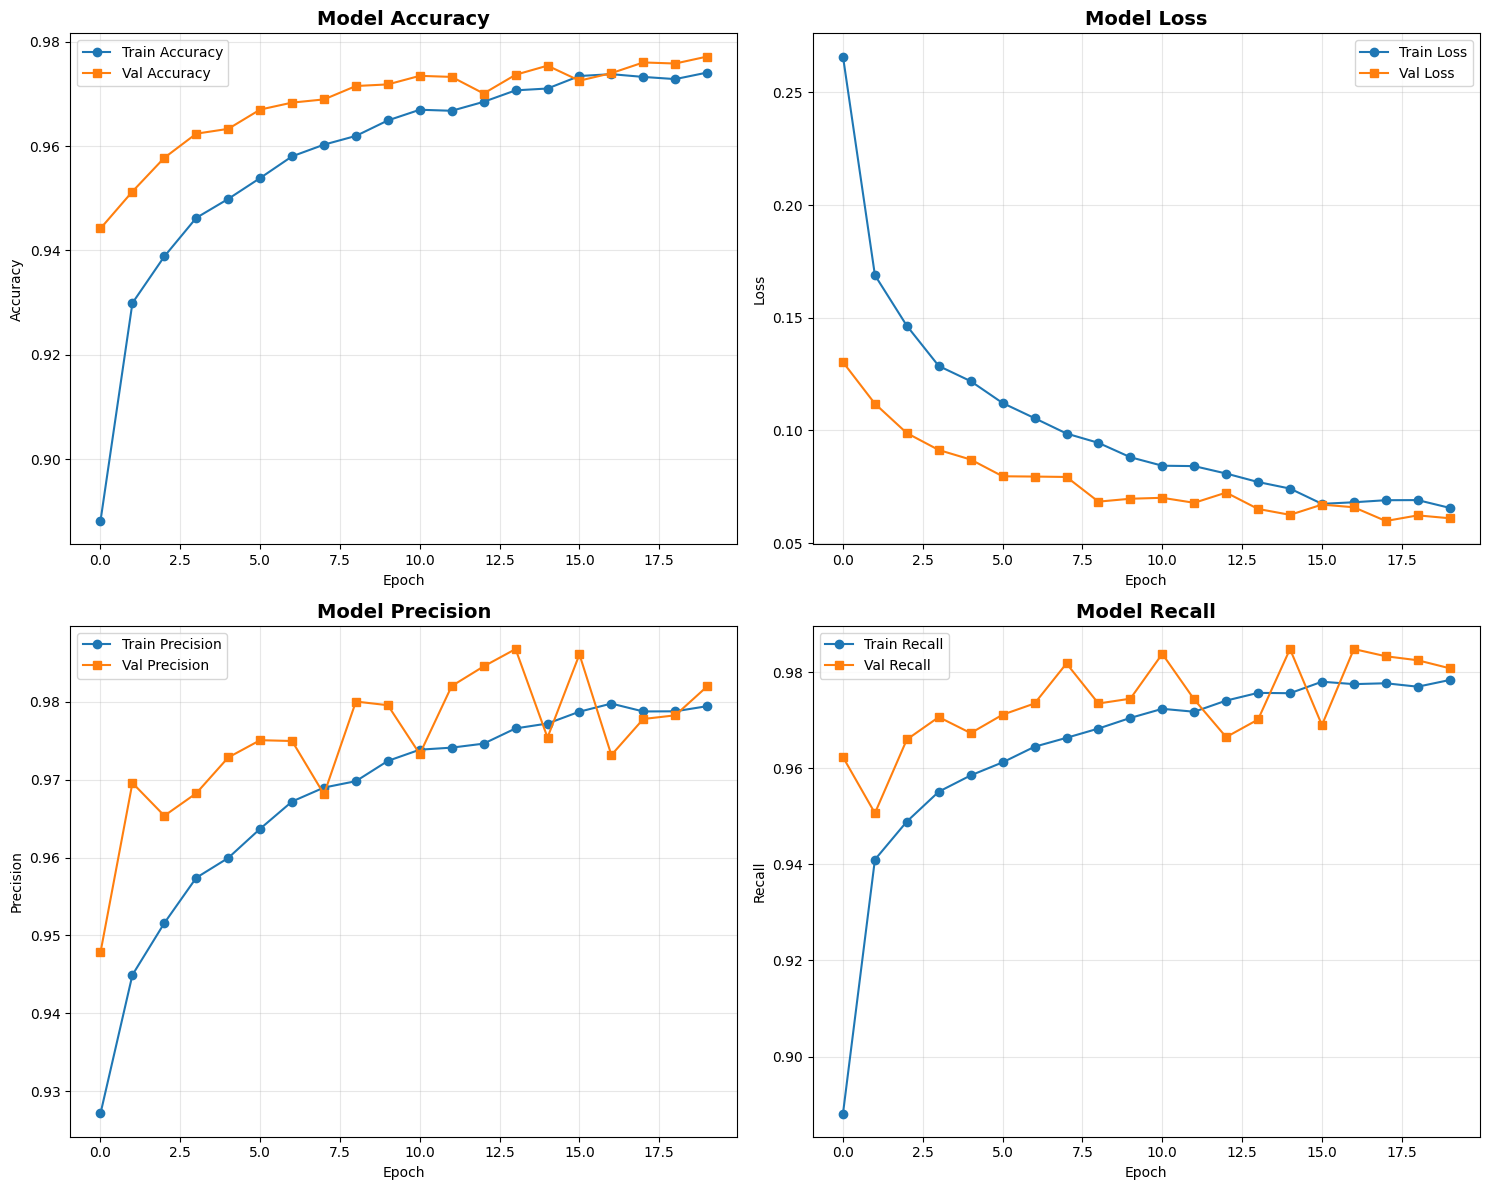

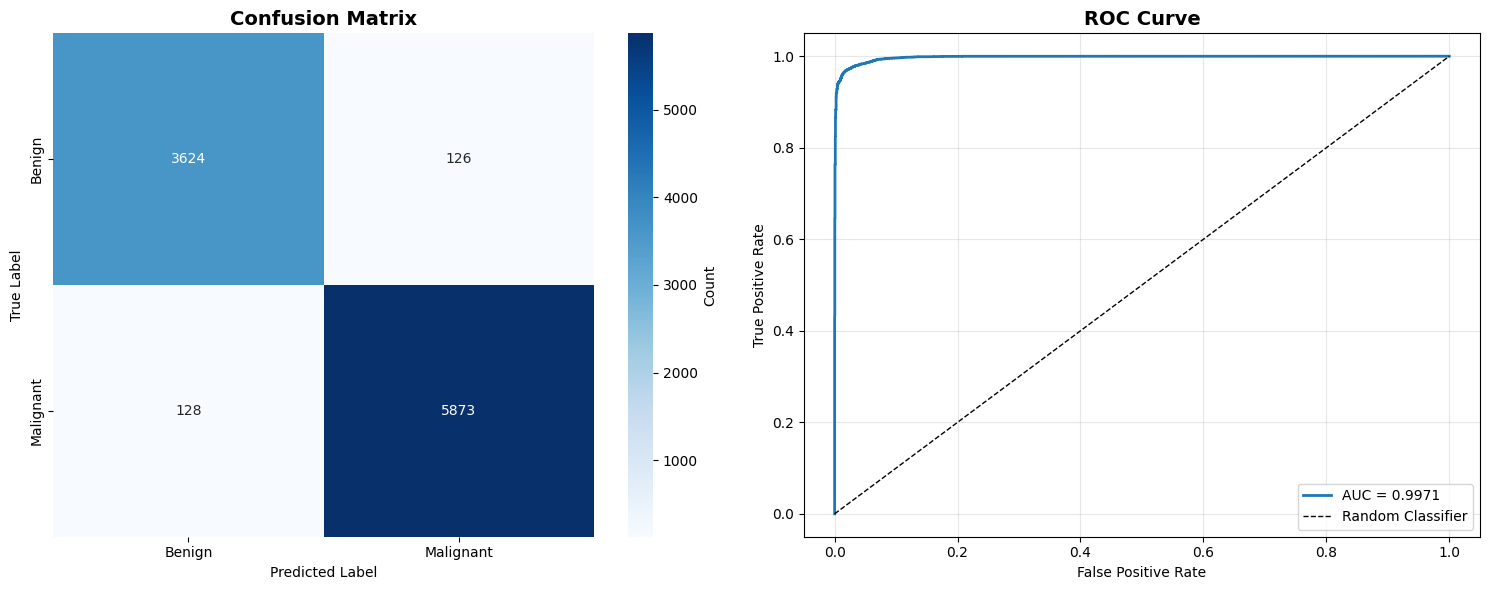

In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
# CHANGED: Import InceptionV3 and its preprocessing function
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import shutil

# ===========================================================================
# CONFIGURATION
# ===========================================================================

CONFIG = {
    # CHANGED: InceptionV3 standard size is 299x299
    'img_height': 299,
    'img_width': 299,
    'batch_size': 32,
    'epochs': 20,
    'early_stopping_patience': 5,
    'learning_rate': 1e-4,
    'validation_split': 0.15,
    'test_split': 0.15,
    'random_state': 42
}

# Set random seeds for reproducibility
np.random.seed(CONFIG['random_state'])
tf.random.set_seed(CONFIG['random_state'])

# ===========================================================================
# DATA PREPARATION (No changes needed here)
# ===========================================================================

def prepare_directory_structure(base_dir):

    print("=" * 70)
    print("PREPARING DATA DIRECTORY STRUCTURE")
    print("=" * 70)

    # Create temporary organized directory
    organized_dir = os.path.join(os.path.dirname(base_dir), 'organized_data')
    train_dir = os.path.join(organized_dir, 'train')
    val_dir = os.path.join(organized_dir, 'validation')
    test_dir = os.path.join(organized_dir, 'test')

    # Collect all image paths with labels
    all_images = []
    all_labels = []

    # Supported image formats
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif'}

    # Iterate through class folders (benign, malignant)
    for class_name in ['Benign', 'Malignant']:
        class_path = os.path.join(base_dir, class_name)

        if not os.path.exists(class_path):
            raise ValueError(f"Class folder not found: {class_path}")

        # Get all subfolders (a, b, c OR d, e, f)
        subfolders = [f for f in os.listdir(class_path)
                     if os.path.isdir(os.path.join(class_path, f))]

        # Collect images from all subfolders
        for subfolder in subfolders:
            subfolder_path = os.path.join(class_path, subfolder)

            for img_file in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_file)

                # Check if file is an image
                if os.path.isfile(img_path) and Path(img_path).suffix.lower() in image_extensions:
                    all_images.append(img_path)
                    all_labels.append(class_name)

    print(f"\nTotal images found: {len(all_images)}")
    print(f"  - Benign: {all_labels.count('Benign')}")
    print(f"  - Malignant: {all_labels.count('Malignant')}")

    # Convert to numpy arrays
    all_images = np.array(all_images)
    all_labels = np.array(all_labels)

    # First split: separate test set
    train_val_images, test_images, train_val_labels, test_labels = train_test_split(
        all_images, all_labels,
        test_size=CONFIG['test_split'],
        stratify=all_labels,
        random_state=CONFIG['random_state']
    )

    # Second split: separate validation set from training set
    train_images, val_images, train_labels, val_labels = train_test_split(
        train_val_images, train_val_labels,
        test_size=CONFIG['validation_split'] / (1 - CONFIG['test_split']),
        stratify=train_val_labels,
        random_state=CONFIG['random_state']
    )

    print(f"\nData split:")
    print(f"  - Training set: {len(train_images)} images")
    print(f"    • Benign: {(train_labels == 'Benign').sum()}")
    print(f"    • Malignant: {(train_labels == 'Malignant').sum()}")
    print(f"  - Validation set: {len(val_images)} images")
    print(f"    • Benign: {(val_labels == 'Benign').sum()}")
    print(f"    • Malignant: {(val_labels == 'Malignant').sum()}")
    print(f"  - Test set: {len(test_images)} images")
    print(f"    • Benign: {(test_labels == 'Benign').sum()}")
    print(f"    • Malignant: {(test_labels == 'Malignant').sum()}")

    # Create organized directory structure
    for split_dir in [train_dir, val_dir, test_dir]:
        for class_name in ['Benign', 'Malignant']:
            os.makedirs(os.path.join(split_dir, class_name), exist_ok=True)

    # Copy files to organized structure
    def copy_images(images, labels, target_dir):
        for img_path, label in zip(images, labels):
            dest_path = os.path.join(target_dir, label, os.path.basename(img_path))
            # Handle duplicate filenames by adding counter
            counter = 1
            base_name = os.path.basename(img_path)
            while os.path.exists(dest_path):
                name, ext = os.path.splitext(base_name)
                dest_path = os.path.join(target_dir, label, f"{name}_{counter}{ext}")
                counter += 1
            shutil.copy2(img_path, dest_path)

    print("\nCopying images to organized directory structure...")
    copy_images(train_images, train_labels, train_dir)
    copy_images(val_images, val_labels, val_dir)
    copy_images(test_images, test_labels, test_dir)
    print("✓ Data organization complete!")

    return organized_dir, train_dir, val_dir, test_dir


# ===========================================================================
# DATA GENERATORS
# ===========================================================================

def create_data_generators(train_dir, val_dir, test_dir):
    """
    Create data generators with augmentation for training and normalization for val/test.
    """

    print("\n" + "=" * 70)
    print("CREATING DATA GENERATORS")
    print("=" * 70)

    # CHANGED: Use InceptionV3's preprocess_input function, not rescale
    train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input
    )

    # Validation and test generators (only InceptionV3 preprocessing)
    val_test_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input
    )

    # Create generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(CONFIG['img_height'], CONFIG['img_width']),
        batch_size=CONFIG['batch_size'],
        class_mode='binary',
        shuffle=True,
        seed=CONFIG['random_state']
    )

    val_generator = val_test_datagen.flow_from_directory(
        val_dir,
        target_size=(CONFIG['img_height'], CONFIG['img_width']),
        batch_size=CONFIG['batch_size'],
        class_mode='binary',
        shuffle=False
    )

    test_generator = val_test_datagen.flow_from_directory(
        test_dir,
        target_size=(CONFIG['img_height'], CONFIG['img_width']),
        batch_size=CONFIG['batch_size'],
        class_mode='binary',
        shuffle=False
    )

    print(f"\n✓ Data generators created successfully!")
    print(f"  - Training samples: {train_generator.samples}")
    print(f"  - Validation samples: {val_generator.samples}")
    print(f"  - Test samples: {test_generator.samples}")
    print(f"  - Class indices: {train_generator.class_indices}")

    return train_generator, val_generator, test_generator


# ===========================================================================
# MODEL ARCHITECTURE (CHANGED TO INCEPTIONV3)
# ===========================================================================

def build_inceptionv3_model():
    """
    Build InceptionV3 model for binary classification with transfer learning.
    """

    print("\n" + "=" * 70)
    print("BUILDING INCEPTIONV3 MODEL")
    print("=" * 70)

    # Load pre-trained InceptionV3 model (without top layers)
    base_model = InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(CONFIG['img_height'], CONFIG['img_width'], 3)
    )

    # Freeze the base model layers
    base_model.trainable = False

    print(f"\nBase model loaded: InceptionV3")
    print(f"Total layers in base model: {len(base_model.layers)}")
    print(f"Base model trainable: {base_model.trainable}")

    # Build custom classification head (same as VGG16 one, which is fine)
    x = base_model.output
    x = GlobalAveragePooling2D(name='global_avg_pool')(x)
    x = Dense(512, activation='relu', name='fc1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = Dropout(0.5, name='dropout1')(x)
    x = Dense(256, activation='relu', name='fc2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = Dropout(0.3, name='dropout2')(x)
    output = Dense(1, activation='sigmoid', name='output')(x)

    # Create final model
    model = Model(inputs=base_model.input, outputs=output, name='InceptionV3_BinaryClassifier')

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=CONFIG['learning_rate']),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.AUC(name='auc')
        ]
    )

    print(f"\n✓ Model built successfully!")
    print(f"\nModel Summary:")
    model.summary()

    # Count trainable parameters
    trainable_params = sum([np.prod(var.shape) for var in model.trainable_variables])
    non_trainable_params = sum([np.prod(var.shape) for var in model.non_trainable_variables])

    print(f"\nTrainable parameters: {trainable_params:,}")
    print(f"Non-trainable parameters: {non_trainable_params:,}")
    print(f"Total parameters: {trainable_params + non_trainable_params:,}")

    return model


# ===========================================================================
# CALLBACKS
# ===========================================================================

def create_callbacks():
    """
    Create training callbacks including early stopping.
    """

    print("\n" + "=" * 70)
    print("SETTING UP CALLBACKS")
    print("=" * 70)

    # Early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=CONFIG['early_stopping_patience'],
        verbose=1,
        mode='min',
        restore_best_weights=True
    )

    # CHANGED: Model checkpoint filename
    model_checkpoint = ModelCheckpoint(
        'best_inceptionv3_model.keras',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    )

    # Reduce learning rate on plateau
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1,
        mode='min'
    )

    callbacks = [early_stopping, model_checkpoint, reduce_lr]

    print(f"\n✓ Callbacks configured:")
    print(f"  - Early Stopping: patience={CONFIG['early_stopping_patience']}, monitor=val_loss")
    print(f"  - Model Checkpoint: saving best model to 'best_inceptionv3_model.keras'")
    print(f"  - Reduce LR on Plateau: factor=0.5, patience=3")

    return callbacks


# ===========================================================================
# TRAINING (No changes needed here)
# ===========================================================================

def train_model(model, train_generator, val_generator, callbacks):
    """
    Train the model.
    """

    print("\n" + "=" * 70)
    print("TRAINING MODEL")
    print("=" * 70)
    print(f"\nEpochs: {CONFIG['epochs']}")
    print(f"Batch size: {CONFIG['batch_size']}")
    print(f"Learning rate: {CONFIG['learning_rate']}")
    print(f"\nStarting training...\n")

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=CONFIG['epochs'],
        callbacks=callbacks,
        verbose=1
    )

    print("\n✓ Training complete!")

    return history


# ===========================================================================
# EVALUATION (No changes needed here)
# ===========================================================================

def evaluate_model(model, test_generator):
    """
    Evaluate model performance on test set.
    """

    print("\n" + "=" * 70)
    print("MODEL EVALUATION")
    print("=" * 70)

    # Evaluate on test set
    test_loss, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(
        test_generator,
        verbose=1
    )

    # Calculate F1 score
    f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

    print(f"\nTest Set Performance:")
    print(f"  - Loss: {test_loss:.4f}")
    print(f"  - Accuracy: {test_accuracy:.4f}")
    print(f"  - Precision: {test_precision:.4f}")
    print(f"  - Recall: {test_recall:.4f}")
    print(f"  - F1 Score: {f1_score:.4f}")
    print(f"  - AUC: {test_auc:.4f}")

    # Generate predictions
    test_generator.reset()
    y_pred_probs = model.predict(test_generator, verbose=1)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()
    y_true = test_generator.classes

    # Classification report
    print(f"\nDetailed Classification Report:")
    class_names = list(test_generator.class_indices.keys())
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)

    return {
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_auc': test_auc,
        'f1_score': f1_score,
        'y_true': y_true,
        'y_pred': y_pred,
        'y_pred_probs': y_pred_probs,
        'confusion_matrix': cm
    }


# ===========================================================================
# VISUALIZATION
# ===========================================================================

def plot_training_history(history):
    """
    Plot training history curves.
    """

    print("\n" + "=" * 70)
    print("GENERATING TRAINING VISUALIZATIONS")
    print("=" * 70)

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    axes[0, 0].plot(history.history['val_accuracy'], label='Val Accuracy', marker='s')
    axes[0, 0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Loss
    axes[0, 1].plot(history.history['loss'], label='Train Loss', marker='o')
    axes[0, 1].plot(history.history['val_loss'], label='Val Loss', marker='s')
    axes[0, 1].set_title('Model Loss', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Precision
    axes[1, 0].plot(history.history['precision'], label='Train Precision', marker='o')
    axes[1, 0].plot(history.history['val_precision'], label='Val Precision', marker='s')
    axes[1, 0].set_title('Model Precision', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Recall
    axes[1, 1].plot(history.history['recall'], label='Train Recall', marker='o')
    axes[1, 1].plot(history.history['val_recall'], label='Val Recall', marker='s')
    axes[1, 1].set_title('Model Recall', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    # CHANGED: Plot filename
    plt.savefig('inceptionv3_training_history.png', dpi=300, bbox_inches='tight')
    print("\n✓ Training history plot saved: 'inceptionv3_training_history.png'")

    return fig


def plot_evaluation_results(results):
    """
    Plot confusion matrix and ROC curve.
    """

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Confusion Matrix
    sns.heatmap(results['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                ax=axes[0], cbar_kws={'label': 'Count'})
    axes[0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')
    axes[0].set_xticklabels(['Benign', 'Malignant'])
    axes[0].set_yticklabels(['Benign', 'Malignant'])

    # ROC Curve
    fpr, tpr, _ = roc_curve(results['y_true'], results['y_pred_probs'])
    axes[1].plot(fpr, tpr, linewidth=2, label=f"AUC = {results['test_auc']:.4f}")
    axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
    axes[1].set_title('ROC Curve', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    # CHANGED: Plot filename
    plt.savefig('inceptionv3_evaluation_results.png', dpi=300, bbox_inches='tight')
    print("✓ Evaluation results plot saved: 'inceptionv3_evaluation_results.png'")

    return fig


# ===========================================================================
# MAIN EXECUTION
# ===========================================================================

def main(base_data_dir):
    """
    Main execution pipeline.
    """

    print("\n" + "=" * 70)
    print("INCEPTIONV3 BINARY CLASSIFICATION PIPELINE") # CHANGED
    print("Benign vs Malignant Tumor Detection")
    print("=" * 70)

    # Step 1: Prepare directory structure
    organized_dir, train_dir, val_dir, test_dir = prepare_directory_structure(base_data_dir)

    # Step 2: Create data generators
    train_gen, val_gen, test_gen = create_data_generators(train_dir, val_dir, test_dir)

    # Step 3: Build model (CHANGED)
    model = build_inceptionv3_model()

    # Step 4: Setup callbacks
    callbacks = create_callbacks()

    # Step 5: Train model
    history = train_model(model, train_gen, val_gen, callbacks)

    # Step 6: Evaluate model
    results = evaluate_model(model, test_gen)

    # Step 7: Visualize results
    plot_training_history(history)
    plot_evaluation_results(results)

    print("\n" + "=" * 70)
    print("PIPELINE COMPLETED SUCCESSFULLY!")
    print("=" * 70)
    print(f"\nModel saved as: 'best_inceptionv3_model.keras'")
    print(f"Training history plot: 'inceptionv3_training_history.png'")
    print(f"Evaluation results plot: 'inceptionv3_evaluation_results.png'")

    return model, history, results


# ===========================================================================
# USAGE
# ===========================================================================

if __name__ == "__main__":
    # Specify your base data directory
    BASE_DATA_DIR = "/content/cancer_dataset/Data"  # This path comes from the unzipping cell
    model, history, results = main(BASE_DATA_DIR)